# **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler

# **Importing Dataset**

In [6]:
file_path = r'D:\ML Projects\Hand Written Digits Recognition\Dataset\train.csv'
data = pd.read_csv(file_path)

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Splitting into input features and output lable**

In [8]:
x = data.iloc[:,1:].values
y = data.iloc[:,:1]["label"]

In [9]:
x.shape,y.shape

((42000, 784), (42000,))

# **Regularization**

In [10]:
x_train = x/255

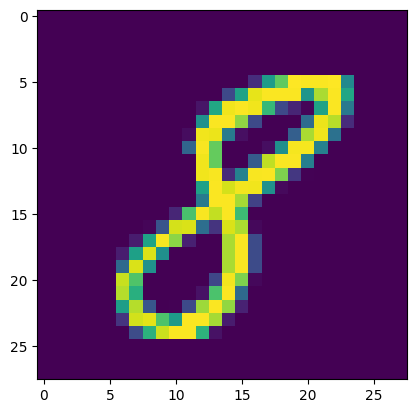

In [66]:
plt.imshow(x[30].reshape(28,28))

# **Splitting into train and test**

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

# **Creating the architecture of the model**

In [13]:
def convolutional_model(input_shape):
    """
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    # Define input layer
    inputs = tf.keras.Input(shape=input_shape)

    # Convolutional layers
    conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    conv2 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    dropout1 = tf.keras.layers.Dropout(0.25)(pool1)

    conv3 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(dropout1)
    conv4 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(conv3)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    dropout2 = tf.keras.layers.Dropout(0.25)(pool2)

    conv5 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(dropout2)
    conv6 = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(conv5)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv6)
    dropout3 = tf.keras.layers.Dropout(0.25)(pool3)

    # Flatten layer
    flatten = tf.keras.layers.Flatten()(dropout3)

    # Fully connected layers
    dense1 = tf.keras.layers.Dense(256, activation='relu')(flatten)
    dropout4 = tf.keras.layers.Dropout(0.5)(dense1)
    output = tf.keras.layers.Dense(10, activation='softmax')(dropout4)

    # Define model
    model = tf.keras.Model(inputs=inputs, outputs=output)

    return model

In [14]:
conv_model = convolutional_model((28,28,1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                          

In [15]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

# **Reshaping the data to be fit for CNN input**

In [16]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# **Fitting the model**

In [18]:
history = conv_model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),)

Epoch 1/10


919/919 [==============================] - 36s 34ms/step - loss: 0.3769 - accuracy: 0.8788 - val_loss: 0.0725 - val_accuracy: 0.9802
Epoch 2/10
919/919 [==============================] - 33s 36ms/step - loss: 0.0975 - accuracy: 0.9726 - val_loss: 0.0578 - val_accuracy: 0.9842
Epoch 3/10
919/919 [==============================] - 29s 32ms/step - loss: 0.0802 - accuracy: 0.9780 - val_loss: 0.0484 - val_accuracy: 0.9866
Epoch 4/10
919/919 [==============================] - 32s 35ms/step - loss: 0.0624 - accuracy: 0.9821 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 5/10
919/919 [==============================] - 43s 47ms/step - loss: 0.0538 - accuracy: 0.9852 - val_loss: 0.0549 - val_accuracy: 0.9845
Epoch 6/10
919/919 [==============================] - 40s 43ms/step - loss: 0.0539 - accuracy: 0.9856 - val_loss: 0.0437 - val_accuracy: 0.9888
Epoch 7/10
919/919 [==============================] - 31s 34ms/step - loss: 0.0442 - accuracy: 0.9878 - val_loss: 0.0453 - val_accurac

# **Evaluating the model**

In [19]:
conv_model.evaluate(x_train,y_train) , conv_model.evaluate(x_test,y_test)

394/394 [==============================] - 2s 6ms/step - loss: 0.0390 - accuracy: 0.9909


([0.009450352750718594, 0.9972108602523804],
 [0.0389774926006794, 0.9908730387687683])

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

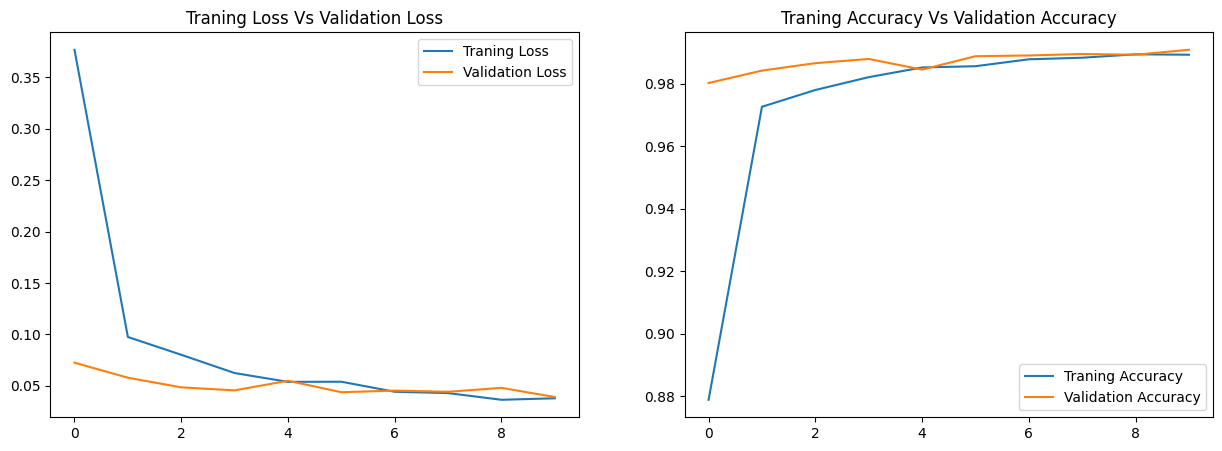

In [21]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss,label="Traning Loss")
plt.plot(val_loss,label="Validation Loss")
plt.title("Traning Loss Vs Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(accuracy,label="Traning Accuracy")
plt.plot(val_accuracy,label="Validation Accuracy")
plt.title("Traning Accuracy Vs Validation Accuracy")
plt.legend()

In [22]:

conv_model.save('D:\ML Projects\Hand Written Digits Recognition\Weights')

INFO:tensorflow:Assets written to: D:\ML Projects\Hand Written Digits Recognition\Weights\assets


INFO:tensorflow:Assets written to: D:\ML Projects\Hand Written Digits Recognition\Weights\assets


In [25]:
conv_model.save_weights('D:\ML Projects\Hand Written Digits Recognition\w\model')

In [58]:
from PIL import Image
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the image using PIL
image = Image.open(r'C:\Users\PMLS\Desktop\tester.jpg')

# Resize and convert to grayscale
image = image.resize((28, 28)).convert('L')

# Convert the image to a NumPy array
image_array = np.array(image)

# Use StandardScaler to scale the pixel values
scale = StandardScaler()
image_array_scaled = scale.fit_transform(image_array.astype(float))

# Reshape for model input
image_array_scaled = image_array_scaled.reshape(-1, 28, 28, 1)

# Make predictions
predictions = conv_model.predict(image_array_scaled)

# Assuming 'conv_model' is your trained model
# 'predictions' will contain the predicted probabilities for each class
print(predictions)


1/1 [==============================] - 0s 40ms/step
[[0.02461913 0.07720279 0.26843652 0.3179348  0.01780894 0.05772919
  0.03248781 0.05805083 0.11063254 0.03509742]]


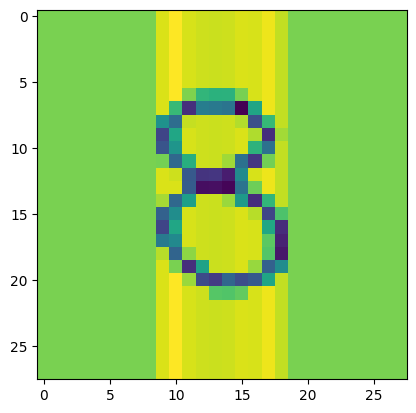

In [59]:
plt.imshow(image_array_scaled.reshape(28,28))

In [60]:
predicted_class_label = np.argmax(predictions)
print("Predicted class label:", predicted_class_label)


Predicted class label: 3
